In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [132]:
data=pd.read_csv(r"C:\Users\Aditya\Downloads\Telecom_customer_churn.csv")

In [133]:
pd.set_option('display.max_columns',21)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [134]:
data.shape

(7043, 21)

In [135]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [136]:
#customer id is unneccessary column i can remove because id is unique for every person it does not contribute anything to our prediction
data.drop('customerID',axis=1,inplace=True)

In [137]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [139]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [140]:
#finding special characters in total charges column
data.loc[lambda data: data['TotalCharges'] ==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [141]:
data['TotalCharges']=data['TotalCharges'].replace(" ",np.nan)

In [142]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [143]:
#converting dtype object into float
data['TotalCharges']=data['TotalCharges'].astype(float)

In [144]:
#fill nan values
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [145]:
#checking null values again
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [146]:
#extracting object type data
obj_data=data.select_dtypes(include='object').columns
int_data=data.select_dtypes(include='int64').columns
flt_data=data.select_dtypes(include='float64').columns
numeric=int_data.append(flt_data)

In [147]:
numeric

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [148]:
len(obj_data)

16

# univariate analysis

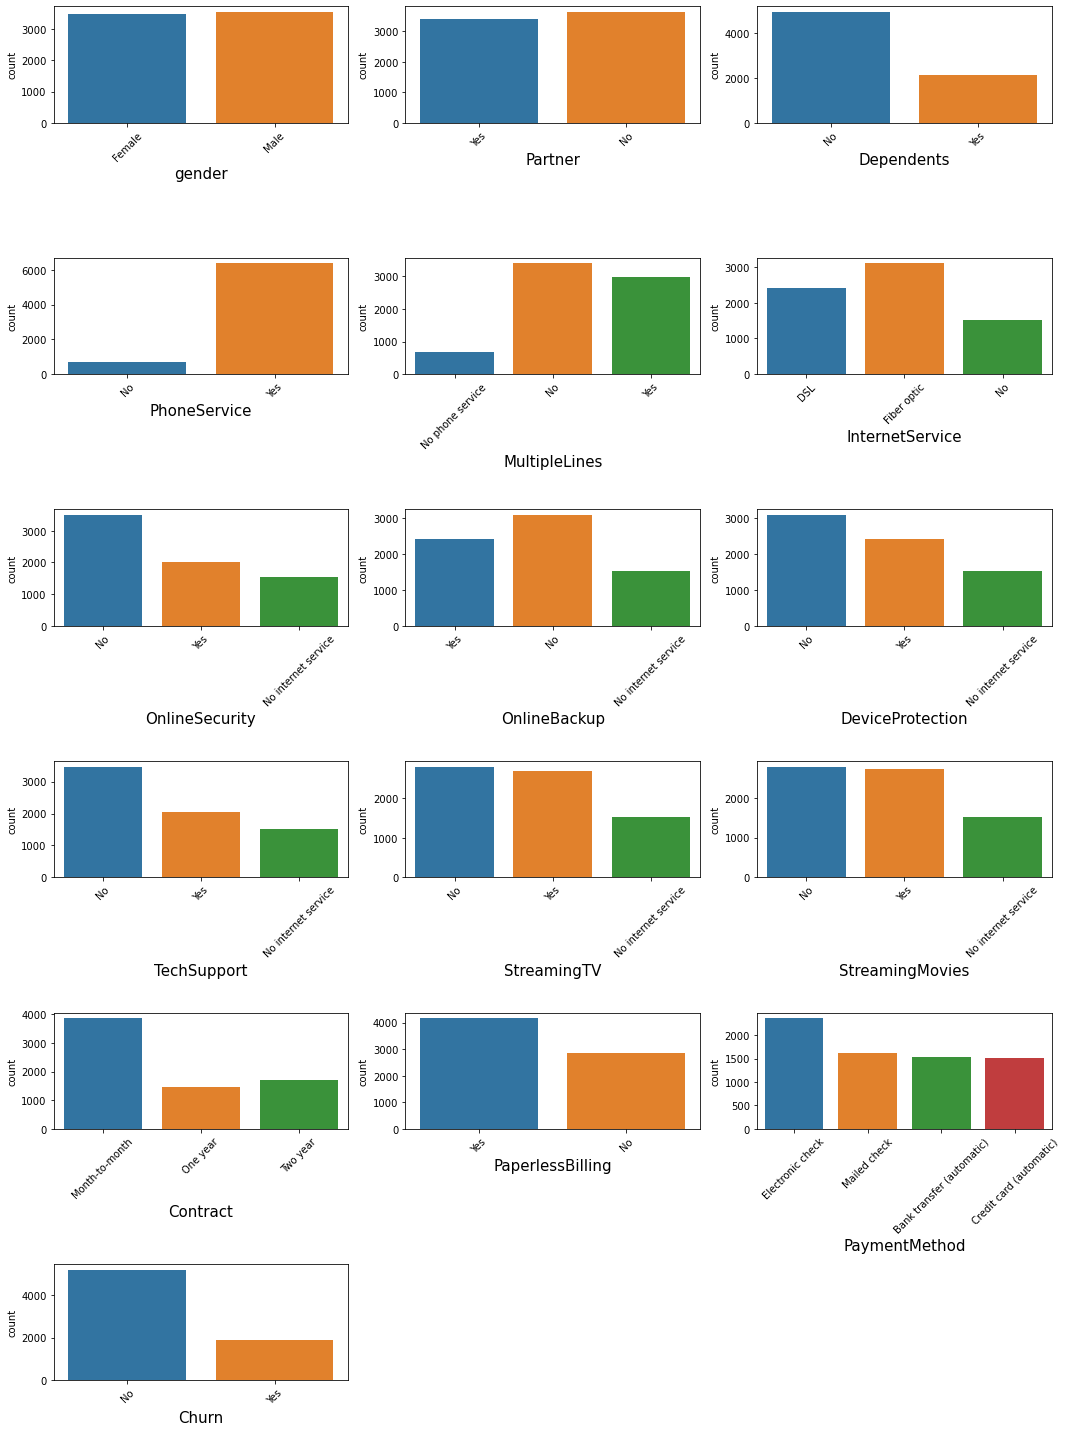

In [78]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in data[obj_data]:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.countplot(data[obj_data][column],)
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation=45)
    plotnumber+=1
    
plt.tight_layout()

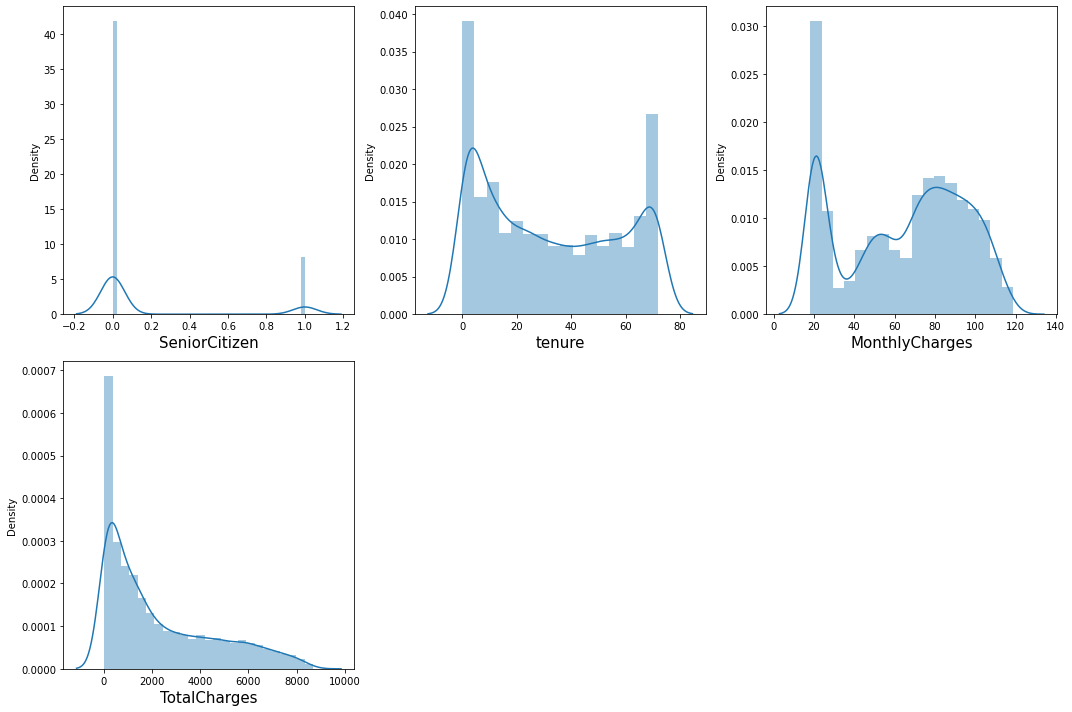

In [87]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in data[numeric]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[numeric][column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
    
plt.tight_layout()

In [ ]:
#observation:
#tenure is 0 to 72 moths 
#in the total charges data is right skewed we ll check skewness of this again

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

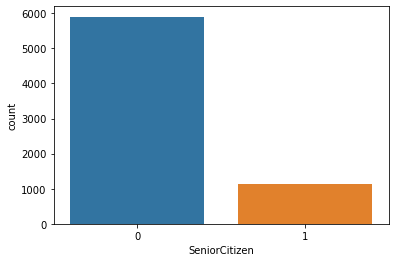

In [90]:
#senior citizen is category data type and it has two types of data 
print(data['SeniorCitizen'].value_counts())
sns.countplot(data['SeniorCitizen'])

In [91]:
#observation:
#we can say most of the subscribers are not a senior citizens 
#senior citizens are less count

<AxesSubplot:xlabel='tenure'>

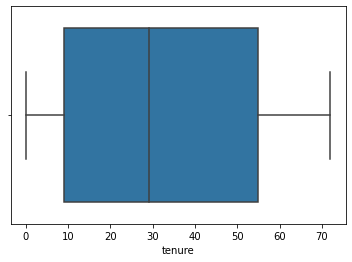

In [92]:
sns.boxplot(data['tenure'])

<AxesSubplot:xlabel='MonthlyCharges'>

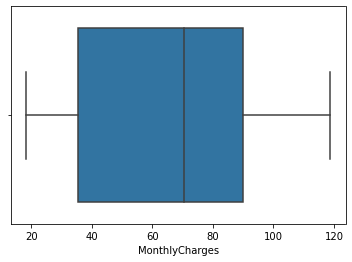

In [93]:
sns.boxplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

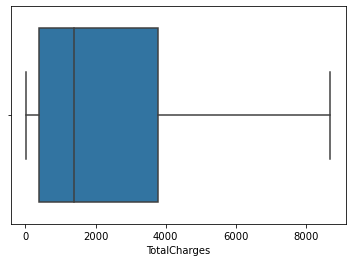

In [94]:
sns.boxplot(data['TotalCharges'])

# bivariate analysis

In [149]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Churn']=le.fit_transform(data['Churn'])

In [150]:
len(obj_data)

16

In [151]:
data[obj_data]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1


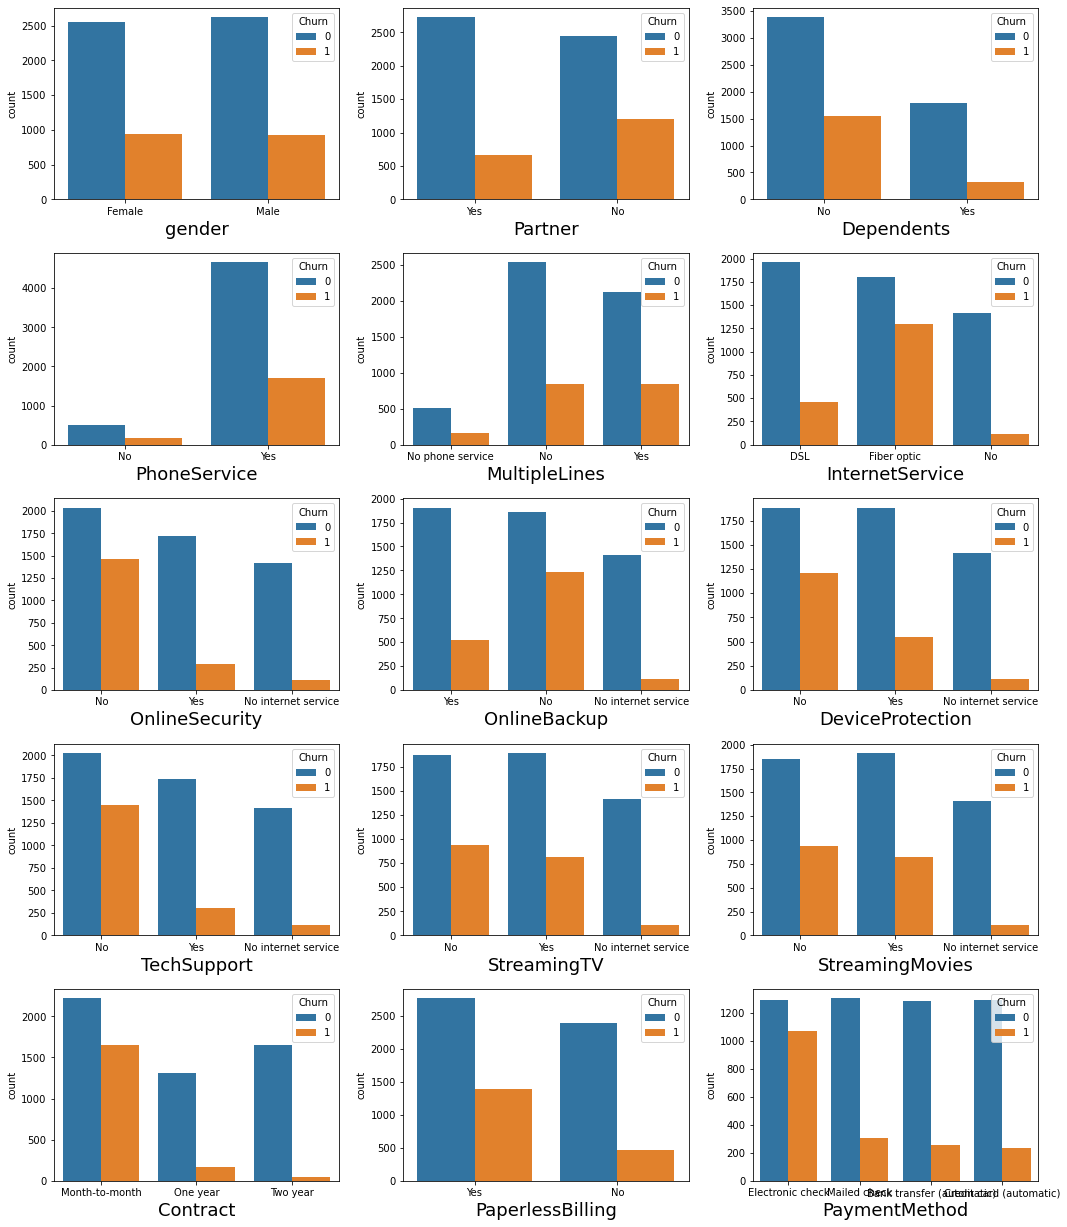

In [152]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in data[obj_data]:
    if plotnumber<=15: #eliminate churn feature 
        ax=plt.subplot(6,3,plotnumber)
        sns.countplot(data[obj_data][column],hue='Churn',data=data)
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
    
plt.tight_layout()

# encoding

In [19]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [153]:
#ordinal encoder for object data type
from sklearn.preprocessing import OrdinalEncoder
ordenc=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=ordenc.fit_transform(data[i].values.reshape(-1,1))
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


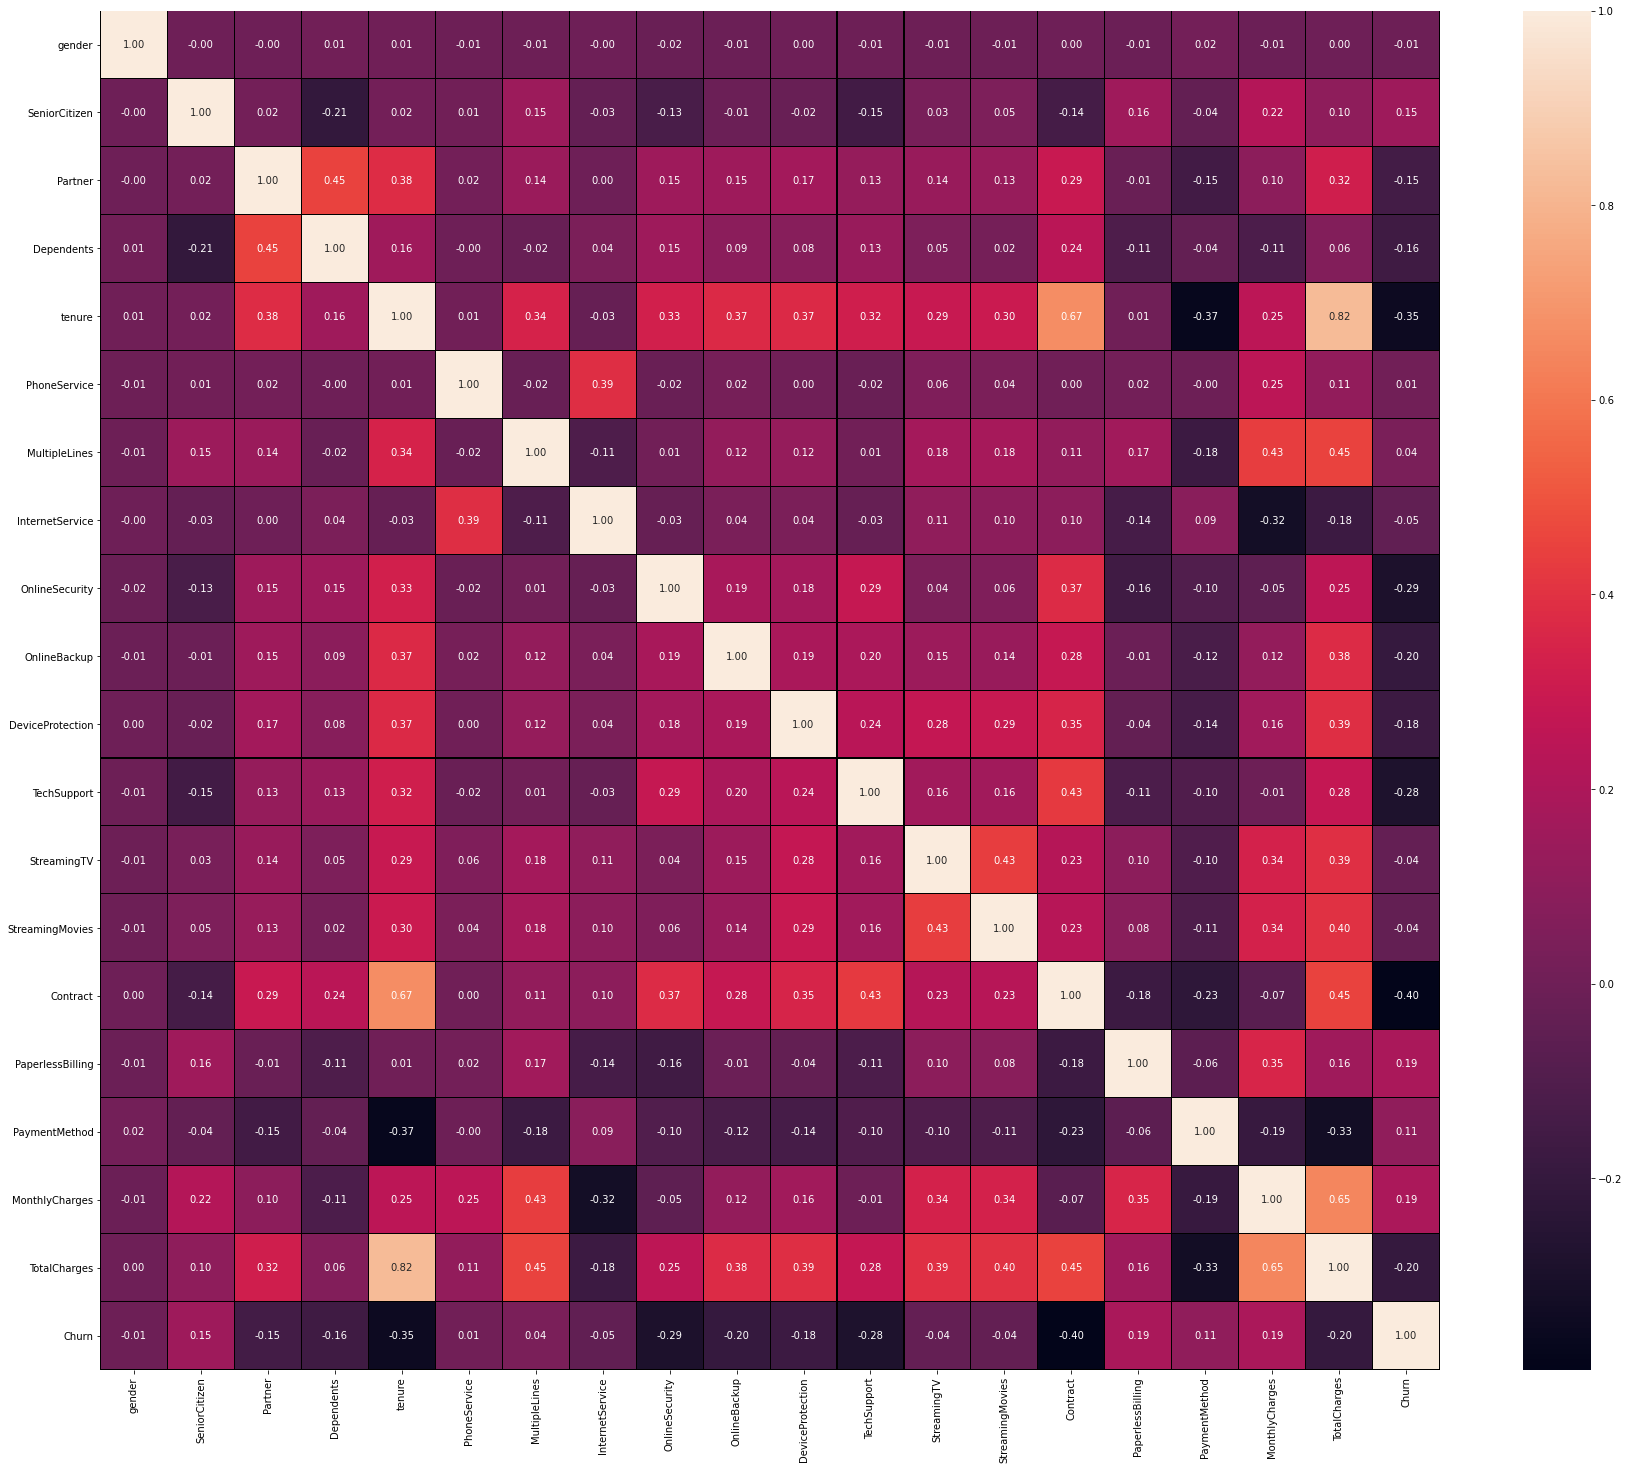

In [119]:
plt.figure(figsize=(30,25))
sns.heatmap(data.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')
plt.show()

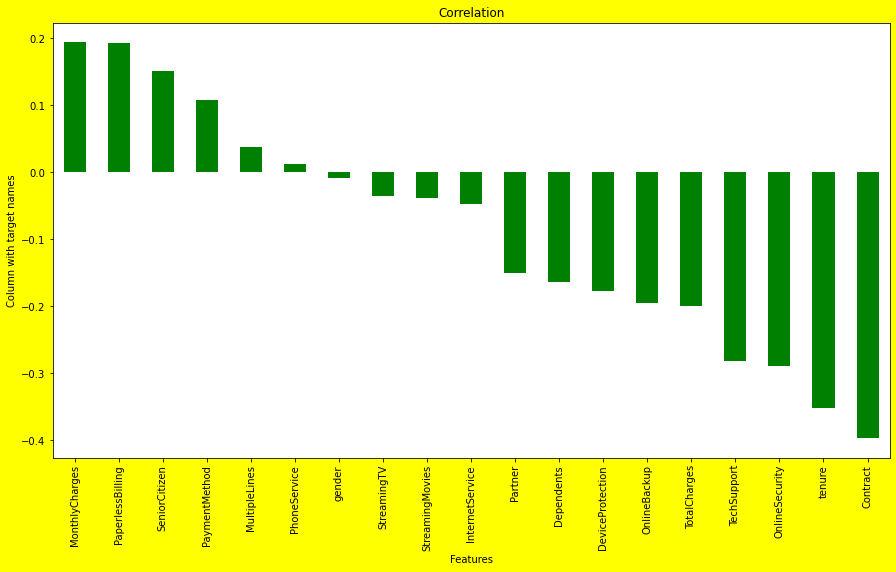

In [120]:
plt.figure(figsize =(15, 8),facecolor='yellow')
data.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()


In [122]:
data[numeric].skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [ ]:
#here senior citizen is categorical dtype so we cannot consider skewness of seno=io citizen 
#i can apply sqrt transformation for totallcharges because data skewed towards right so sqrt works better


In [160]:
data['TotalCharges']=np.sqrt(data['TotalCharges'])
data[numeric].skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.307849
dtype: float64

In [ ]:
#skewness is in acceptable range

In [206]:
#divide data into independent and dependent 
X=data.drop('Churn',axis=1)
y=data['Churn']

In [207]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [208]:
#it looks imbalanced we have to balance 
#i am using SMOTE 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [209]:
X.shape

(10348, 19)

In [210]:
y.shape

(10348,)

In [211]:
#scaling the data by using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.000000,0.0,1.000000,0.000000,0.013889,0.0,0.5,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.666667,0.115423,0.012690
1,1.000000,0.0,0.000000,0.000000,0.472222,1.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.000000,0.000000,0.5,0.000000,1.000000,0.385075,0.440402
2,1.000000,0.0,0.000000,0.000000,0.027778,1.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.000000,0.354229,0.068241
3,1.000000,0.0,0.000000,0.000000,0.625000,0.0,0.5,0.0,1.0,0.0,1.000000,1.0,0.000000,0.000000,0.5,0.000000,0.000000,0.239303,0.434049
4,0.000000,0.0,0.000000,0.000000,0.027778,1.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.666667,0.521891,0.089794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0.000000,1.0,0.000000,0.000000,0.013889,0.0,0.5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.722086,0.069981,0.007791
10344,0.154393,0.0,0.000000,0.000000,0.125000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.718131,0.267354,0.181481
10345,0.000000,0.0,0.503375,0.496625,0.250000,0.0,0.5,0.0,0.0,0.0,0.503375,0.0,0.503375,0.496625,0.0,1.000000,0.666667,0.186952,0.229255
10346,0.000000,0.0,0.000000,1.000000,0.013889,1.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.453376,0.666667,0.605281,0.051283


In [212]:
#checking multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_score"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["columns"]=x.columns
vif

,vif_score,columns
0,2.027654,gender
1,1.265765,SeniorCitizen
2,2.764370,Partner
3,1.888596,Dependents
4,34.362409,tenure
5,14.355693,PhoneService
6,2.896330,MultipleLines
7,4.577647,InternetService
8,2.091766,OnlineSecurity
9,2.290487,OnlineBackup


In [213]:
x.drop(['TotalCharges','PhoneService'],axis=1,inplace=True)

In [214]:
#checking multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_score"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["columns"]=x.columns
vif

,vif_score,columns
0,1.986207,gender
1,1.265221,SeniorCitizen
2,2.761233,Partner
3,1.872398,Dependents
4,6.767491,tenure
5,2.815518,MultipleLines
6,2.577184,InternetService
7,2.041049,OnlineSecurity
8,2.267837,OnlineBackup
9,2.431398,DeviceProtection


# model building

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
lr=LogisticRegression()

In [216]:
#finding best random state 
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    predx=lr.predict(x_test)
    acc=accuracy_score(y_test,predx)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('best accuracy is',maxAccu,'on random_state',maxRS)   

best accuracy is 0.7893312717433321 on random_state 378


In [217]:
#here the random state 198 is given best accuracy 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=378)

In [218]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n==========train results============")
        print(f'accuracy score:{accuracy_score(y_train,y_pred)*100:2f}%')
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n=========test reslts===========')
        print(f'accuracy score is:{accuracy_score(y_test,pred)*100:2f}%')
        print('\n')
        print(confusion_matrix(y_test,pred))
        print('\n')
        print(classification_report(y_test,pred))
        scr=cross_val_score(clf,x,y,cv=10)
        print('cross validation score on',clf,'is',scr.mean())

In [219]:
# Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:75.776317%

=========test reslts===========
accuracy score is:78.933127%


[[ 988  330]
 [ 215 1054]]


              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1318
           1       0.76      0.83      0.79      1269

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587

cross validation score on LogisticRegression() is 0.7638204430988891


In [220]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:84.770004%

=========test reslts===========
accuracy score is:78.855818%


[[ 923  395]
 [ 152 1117]]


              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1318
           1       0.74      0.88      0.80      1269

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.79      2587
weighted avg       0.80      0.79      0.79      2587

cross validation score on KNeighborsClassifier() is 0.779866191984601


In [221]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dcfr=DecisionTreeClassifier()
dcfr.fit(x_train,y_train)
print_score(dcfr,x_train,x_test,y_train,y_test,train=True)
print_score(dcfr,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:99.858266%

=========test reslts===========
accuracy score is:79.938152%


[[1045  273]
 [ 246 1023]]


              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1318
           1       0.79      0.81      0.80      1269

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

cross validation score on DecisionTreeClassifier() is 0.8056765621057943


In [222]:
#random forest classifier 
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier()
rfclf.fit(x_train,y_train)
print_score(rfclf,x_train,x_test,y_train,y_test,train=True)
print_score(rfclf,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:99.858266%

=========test reslts===========
accuracy score is:85.890993%


[[1170  148]
 [ 217 1052]]


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1318
           1       0.88      0.83      0.85      1269

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587

cross validation score on RandomForestClassifier() is 0.8523546286173485


In [223]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:84.744234%

=========test reslts===========
accuracy score is:83.533050%


[[1124  194]
 [ 232 1037]]


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1318
           1       0.84      0.82      0.83      1269

    accuracy                           0.84      2587
   macro avg       0.84      0.83      0.84      2587
weighted avg       0.84      0.84      0.84      2587

cross validation score on SVC() is 0.8217132471804071


In [224]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

gbdt.fit(x_train,y_train)
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:86.741399%

=========test reslts===========
accuracy score is:86.161577%


[[1146  172]
 [ 186 1083]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1318
           1       0.86      0.85      0.86      1269

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587

cross validation score on GradientBoostingClassifier() is 0.8522559545501267


In [225]:
#plotting ROC AUC curve 
from sklearn.metrics import plot_roc_curve,roc_auc_score


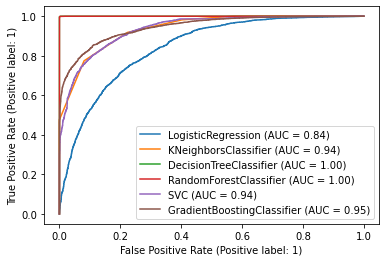

In [226]:
#how wel our model is works on training data 
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dcfr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfclf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(gbdt,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

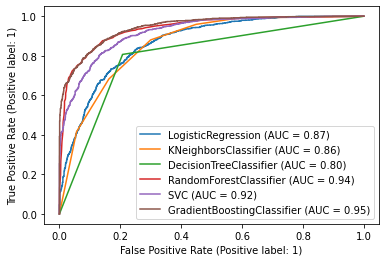

In [227]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dcfr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfclf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [228]:
#hyper prameter tunning 
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
params={'criterion': ['entropy','gini'],
            'n_estimators': [120,160,180],
            'max_depth' :[4,6,8,10,],
            'min_samples_split':[5,8,9],
            'min_samples_leaf':[5,7],
            'max_features':['auto','sqrt','log2']
             }

grd=GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print('best params==>', grd.best_params_)

rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)

best params==> {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 160}


In [230]:
print('confusion martrix \n',rf_conf_mat)

confusion martrix 
 [[1173  145]
 [ 224 1045]]


In [231]:
accuracy_score(y_test,y_pred)

0.8573637417858523

In [233]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1318
           1       0.88      0.82      0.85      1269

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



In [235]:
#save the model
import pickle
filename='customer_churn.pkl'
pickle.dump(grd,open(filename,'wb'))

In [236]:
#conclusion
loaded_model= pickle.load(open('customer_churn.pkl', 'rb'))
results=loaded_model.score(x_test,y_test)
print(results)

0.8631619636644762


In [237]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586
predicted,0,1,1,1,1,0,0,1,0,1,...,0,0,0,1,1,1,1,0,1,1
original,0,1,1,1,1,0,0,1,0,1,...,0,0,1,1,1,1,1,0,1,1
